# Level 1

### Exploratory Data Analysis (EDA)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [59]:
df = pd.read_csv('retail_sales.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [60]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [61]:
df.shape

(1000, 9)

##### WE have One thousand Rows and Nine Columns

In [62]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [63]:
df.isnull().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [64]:
df.select_dtypes(include='int')

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,34,3,50,150
1,2,26,2,500,1000
2,3,50,1,30,30
3,4,37,1,500,500
4,5,30,2,50,100
...,...,...,...,...,...
995,996,62,1,50,50
996,997,52,3,30,90
997,998,23,4,25,100
998,999,36,3,50,150


##### Total 5 interger columns 

In [65]:
df.select_dtypes(include='object')

,Date,Customer ID,Gender,Product Category
0,2023-11-24,CUST001,Male,Beauty
1,2023-02-27,CUST002,Female,Clothing
2,2023-01-13,CUST003,Male,Electronics
3,2023-05-21,CUST004,Male,Clothing
4,2023-05-06,CUST005,Male,Beauty
...,...,...,...,...
995,2023-05-16,CUST996,Male,Clothing
996,2023-11-17,CUST997,Male,Beauty
997,2023-10-29,CUST998,Female,Beauty
998,2023-12-05,CUST999,Female,Electronics


##### Total 4 string columns 

In [66]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [67]:
num1 = df.select_dtypes(include='int')
num1.corr()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


In [68]:
product = df['Product Category'].value_counts()
product

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Text(0.5, 1.0, 'Sales Percentage Of Products')

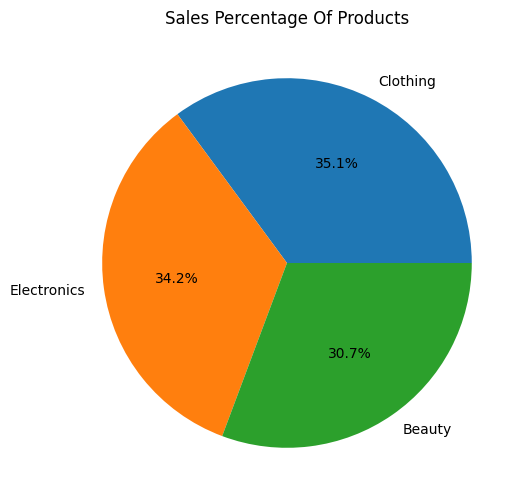

In [69]:
plt.figure(figsize=(8,6))
plt.pie(product, labels=product.index,autopct='%1.1f%%')
plt.title('Sales Percentage Of Products')

In [70]:
gender_col = df['Gender'].value_counts()
gender_col

Gender
Female    510
Male      490
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

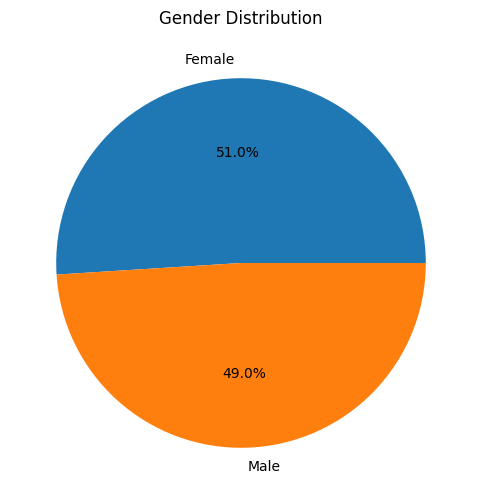

In [71]:
plt.figure(figsize=(8,6))
plt.pie(gender_col, labels=gender_col.index,autopct='%1.1f%%')
plt.title('Gender Distribution')

In [72]:
avg_age = df['Age'].mean()
avg_age

np.float64(41.392)

In [73]:
avg_age_male = df[df['Gender']=='Male']['Age'].mean()
avg_age_male

np.float64(41.42857142857143)

In [74]:
avg_age_fmale = df[df['Gender']=='Female']['Age'].mean()
avg_age_fmale

np.float64(41.35686274509804)

In [75]:
avg_gender_age = pd.DataFrame({'Category': ['Male','Female'],
              'Average_Age':[41.43, 41.36] })

Text(0.5, 1.0, 'Average Age by Gender')

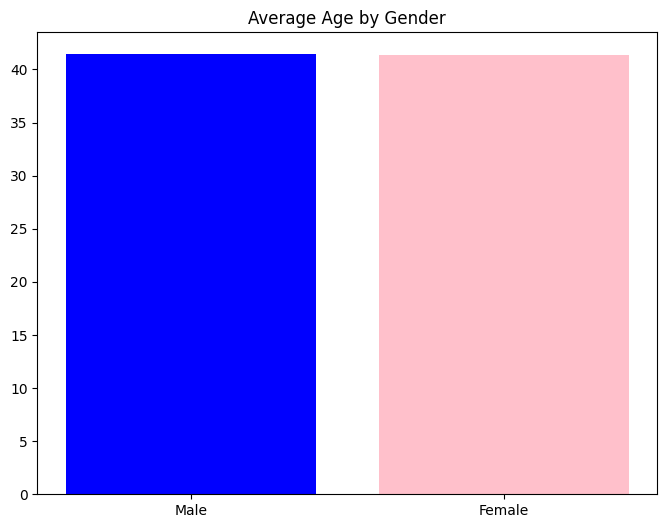

In [76]:
plt.figure(figsize=(8,6))
plt.bar(avg_gender_age['Category'], avg_gender_age['Average_Age'], color=['blue', 'pink'])
plt.title('Average Age by Gender')

In [77]:
sorted_df = df.sort_values(by='Date')
sorted_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [78]:
sorted_df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500
649,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30


In [79]:
sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])

In [80]:
sorted_df['Year'] = sorted_df['Date'].dt.year
sorted_df['Month_Abbr'] = sorted_df['Date'].dt.strftime('%b') 

In [81]:
sorted_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_Abbr
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023,Jan
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023,Jan
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023,Jan
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023,Jan
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,2023,Dec
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,2023,Dec
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,2023,Dec
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,Jan


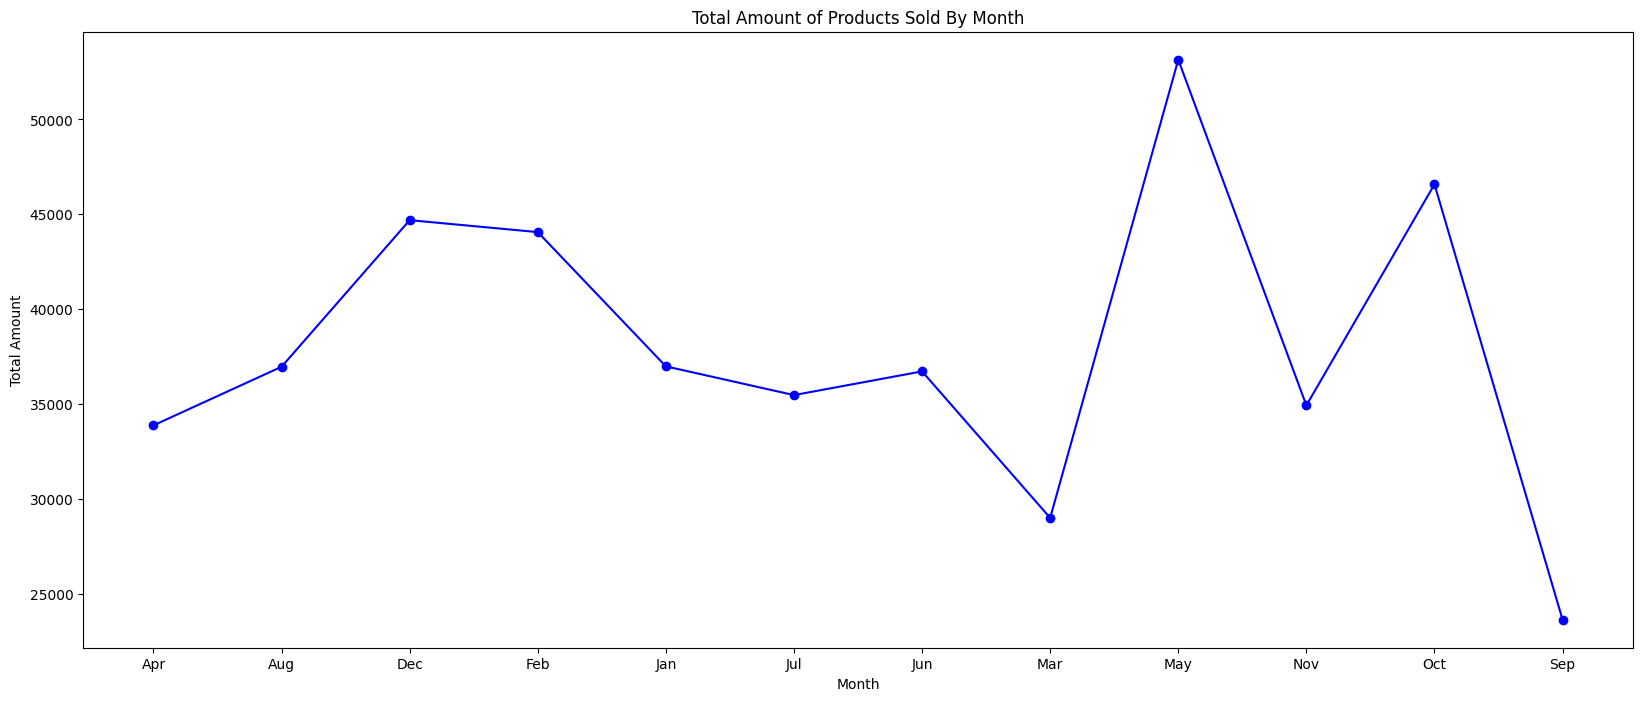

In [82]:
mothly_trend = sorted_df.groupby('Month_Abbr')['Total Amount'].sum()
plt.figure(figsize=(20,8))
plt.plot(mothly_trend, marker='o', linestyle='-', color='b')
plt.title('Total Amount of Products Sold By Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

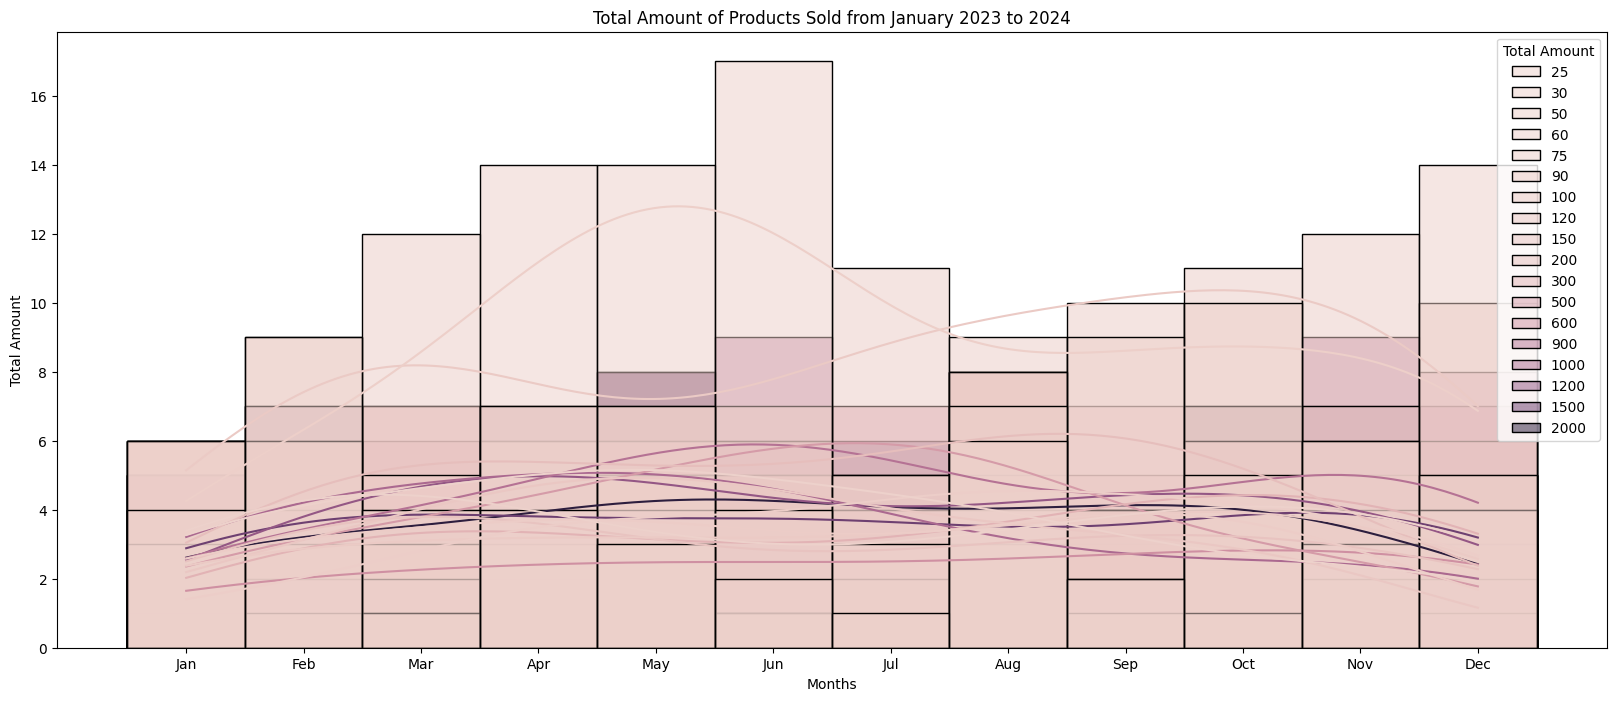

In [83]:
plt.figure(figsize=(20,8))
sns.histplot(x=sorted_df['Month_Abbr'], hue= sorted_df['Total Amount'], bins=12,kde=True)
plt.title('Total Amount of Products Sold from January 2023 to 2024')
plt.xlabel('Months')
plt.ylabel('Total Amount')
plt.show()

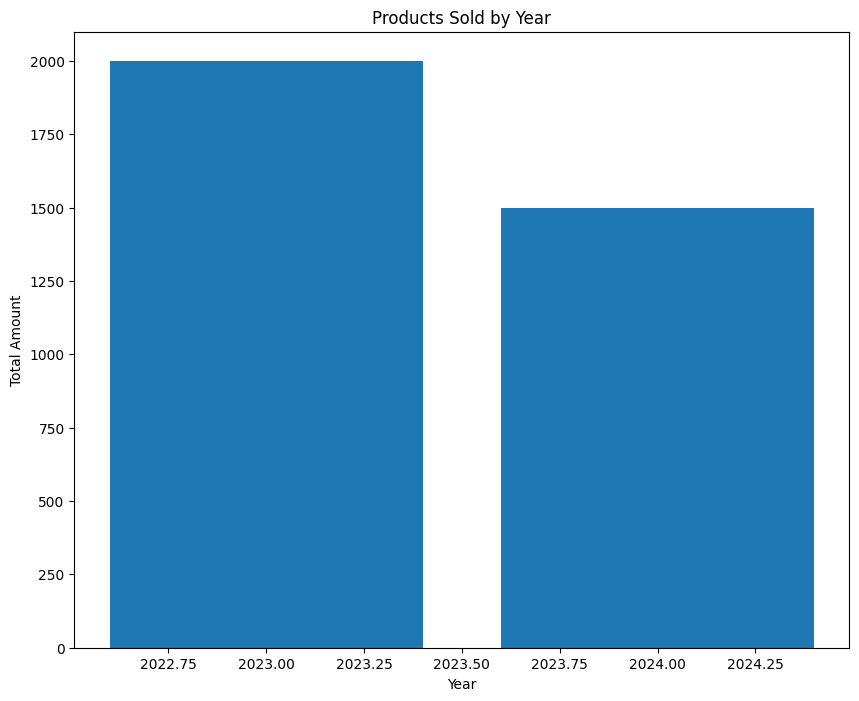

In [84]:
plt.figure(figsize=(10,8))
plt.bar(x=sorted_df['Year'], height= sorted_df['Total Amount'])
plt.title('Products Sold by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

In [85]:
sorted_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_Abbr
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023,Jan
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023,Jan
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023,Jan
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023,Jan
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,2023,Dec
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,2023,Dec
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,2023,Dec
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,Jan


In [86]:
counts = sorted_df.groupby(['Year', 'Month_Abbr', 'Product Category']).size()
print(counts)

Year  Month_Abbr  Product Category
2023  Apr         Beauty              29
                  Clothing            36
                  Electronics         21
      Aug         Beauty              24
                  Clothing            32
                  Electronics         38
      Dec         Beauty              25
                  Clothing            26
                  Electronics         40
      Feb         Beauty              26
                  Clothing            33
                  Electronics         26
      Jan         Beauty              25
                  Clothing            26
                  Electronics         25
      Jul         Beauty              27
                  Clothing            19
                  Electronics         26
      Jun         Beauty              25
                  Clothing            28
                  Electronics         24
      Mar         Beauty              21
                  Clothing            38
                  Elec

Everything is going well, so I think we do not need a recommendation based on prediction unless something happens that helps the company increase its profit like increasing the amount and adding more different type of products.